<a href="https://colab.research.google.com/github/DipperGF/ianotebooks/blob/master/IANotebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import numpy as np

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from PIL import Image

In [22]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat (5).jpg


In [0]:
iv3 = InceptionV3()

In [0]:
print(iv3.summary())

In [32]:


# Cambia ./cat.jpg para cambiar la imagen
x = image.img_to_array(image.load_img("./cat.jpg", target_size=(299,299)))
#Cambio de rango, de 0-255 => -1-1
x /= 255
x -= 0.5
x *= 2

x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

y = iv3.predict(x)
decode_predictions(y)

[[('n02123045', 'tabby', 0.7778454),
  ('n02123159', 'tiger_cat', 0.14295655),
  ('n02124075', 'Egyptian_cat', 0.05036015),
  ('n04367480', 'swab', 0.0009136071),
  ('n03958227', 'plastic_bag', 0.00081734173)]]

## Ataques adversarios

In [25]:
inp_layer = iv3.layers[0].input
out_layer = iv3.layers[-1].output

target_class = 951

loss = out_layer[0, target_class]

grad = K.gradients(loss, inp_layer)[0]

adv = np.copy(x)

optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

pert = 0.01

max_pert = x + pert
min_pert = x - pert

cost = 0.0

while cost < 0.95:
    
    gr, cost = optimize_gradient([adv, 0])
    
    adv += gr
    
    adv = np.clip(adv, min_pert, max_pert)
    
    print("Cost: ", cost)

Cost:  2.9990324e-05
Cost:  3.0222433e-05
Cost:  3.04583e-05
Cost:  3.069843e-05
Cost:  3.0940108e-05
Cost:  3.1184925e-05
Cost:  3.143498e-05
Cost:  3.1686683e-05
Cost:  3.1940242e-05
Cost:  3.2195727e-05
Cost:  3.2454776e-05
Cost:  3.271818e-05
Cost:  3.298618e-05
Cost:  3.325912e-05
Cost:  3.3539407e-05
Cost:  3.382448e-05
Cost:  3.4109766e-05
Cost:  3.440053e-05
Cost:  3.4693294e-05
Cost:  3.4982368e-05
Cost:  3.527641e-05
Cost:  3.5571426e-05
Cost:  3.587081e-05
Cost:  3.6170102e-05
Cost:  3.6471058e-05
Cost:  3.6774683e-05
Cost:  3.7082205e-05
Cost:  3.73942e-05
Cost:  3.770825e-05
Cost:  3.8024984e-05
Cost:  3.834738e-05
Cost:  3.8673712e-05
Cost:  3.9007176e-05
Cost:  3.9341172e-05
Cost:  3.9678147e-05
Cost:  4.001646e-05
Cost:  4.0358384e-05
Cost:  4.0704836e-05
Cost:  4.1056242e-05
Cost:  4.1411386e-05
Cost:  4.176828e-05
Cost:  4.212469e-05
Cost:  4.2486892e-05
Cost:  4.285565e-05
Cost:  4.3232645e-05
Cost:  4.3614793e-05
Cost:  4.4003864e-05
Cost:  4.4399523e-05
Cost:  4.48

In [0]:
adv /= 2
adv += 0.5
adv *= 255


<function matplotlib.pyplot.show>

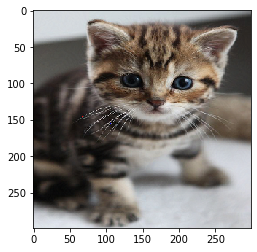

In [27]:
plt.imshow(adv[0].astype(np.uint8))
plt.show

In [0]:
im = Image.fromarray(adv[0].astype(np.uint8))
im.save('./hacked.png')
files.download('hacked.png')